# Lanjutan proses dari assignment 4, download dataset berikut:
https://www.kaggle.com/datasets/mathchi/diabetes-data-set
Lalu lakukan proses transformasi data sampai dataset siap untuk dilakukan proses training pada machine learning.
upload file ipynb pada akun github masing-masing, dan upload link github di LMS

In [46]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [47]:
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [54]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.00,0,1,never,25.19,6.60,140,0
1,Female,54.00,0,0,No Info,27.32,6.60,80,0
2,Male,28.00,0,0,never,27.32,5.70,158,0
3,Female,36.00,0,0,current,23.45,5.00,155,0
4,Male,76.00,1,1,current,20.14,4.80,155,0


# Data Preprocessing and Data Visualization

In [55]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [56]:
# No. of duplicate rows in the dataset
df.duplicated().sum()

3854

In [57]:
df = df.drop_duplicates()
print(f"No. of Duplcate rows after deleting duplicate rows: {df.duplicated().sum()}")

No. of Duplcate rows after deleting duplicate rows: 0


In [58]:
df['diabetes'].value_counts()

0    87664
1     8482
Name: diabetes, dtype: int64

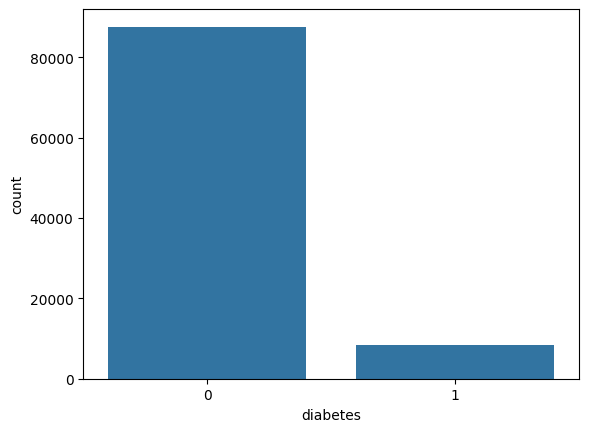

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=df['diabetes'],data=df)
plt.show()

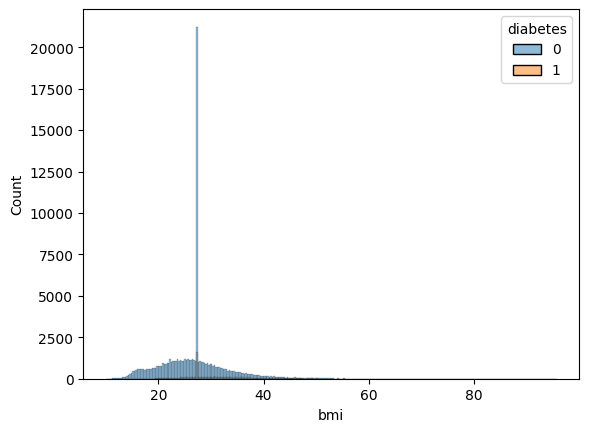

In [60]:
sns.histplot(data=df,x='bmi',hue='diabetes')
plt.show()

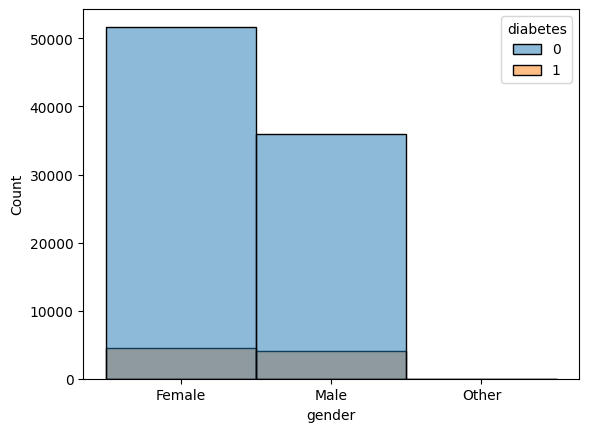

In [61]:
sns.histplot(data=df,x='gender',hue='diabetes')
plt.show()

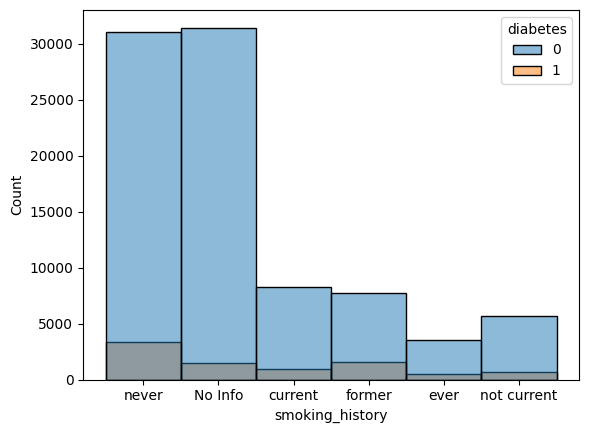

In [62]:
sns.histplot(data=df,x='smoking_history',hue='diabetes')
plt.show()

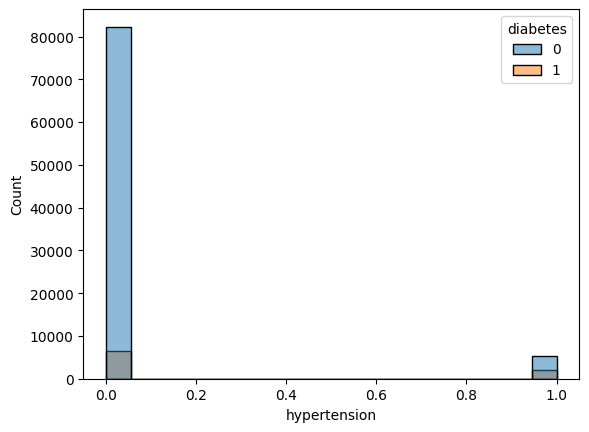

In [63]:
sns.histplot(data=df,x='hypertension',hue='diabetes')
plt.show()

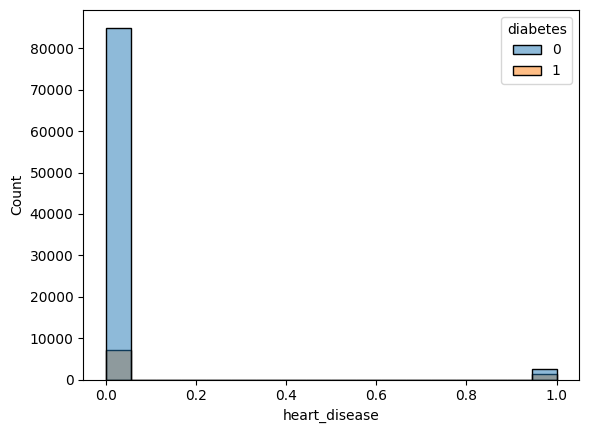

In [64]:
sns.histplot(data=df,x='heart_disease',hue='diabetes')
plt.show()

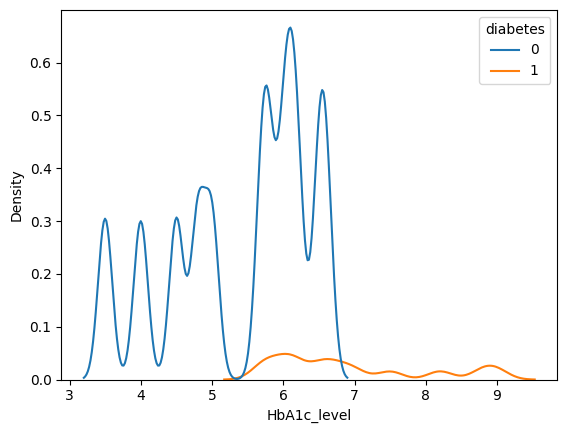

In [65]:
sns.kdeplot(data=df,x='HbA1c_level',hue='diabetes')
plt.show()

In [66]:
df['HbA1c_level'].value_counts()

6.60    8164
5.70    8124
6.50    8051
5.80    7992
6.00    7988
6.20    7958
6.10    7716
3.50    7319
4.80    7296
4.50    7290
4.00    7205
5.00    7155
8.80     660
8.20     659
9.00     652
7.50     642
6.80     642
7.00     633
Name: HbA1c_level, dtype: int64

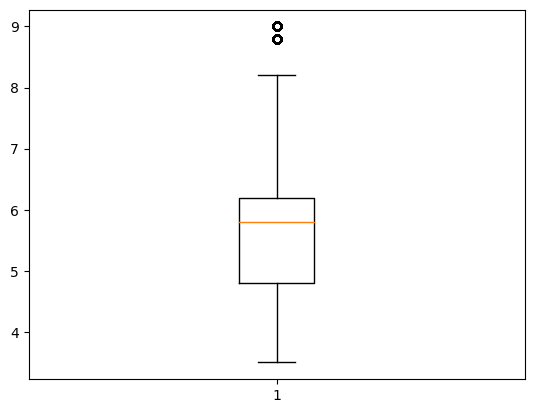

In [67]:
plt.boxplot(df['HbA1c_level'])
plt.show()

In [68]:
mean = df['HbA1c_level'].mean()
std  = df['HbA1c_level'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df = df[(df['HbA1c_level'] >= lower_bound)
                & (df['HbA1c_level'] <= upper_bound)]

Lower Bound : 3.386144689584599
Upper Bound : 7.679072792161911


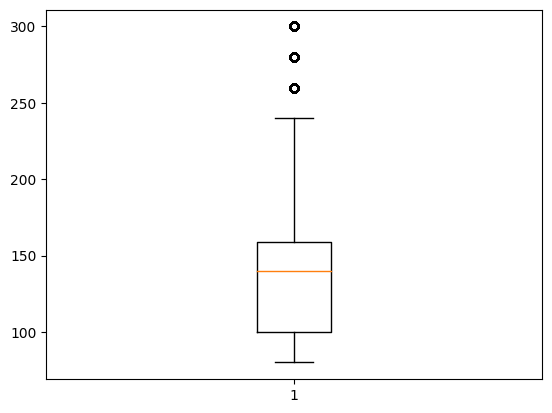

In [69]:
plt.boxplot(df['blood_glucose_level'])
plt.show()

In [70]:
mean = df['blood_glucose_level'].mean()
std  = df['blood_glucose_level'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df = df[(df['blood_glucose_level'] >= lower_bound)
                & (df['blood_glucose_level'] <= upper_bound)]

Lower Bound : 57.75997192007591
Upper Bound : 216.387646874721


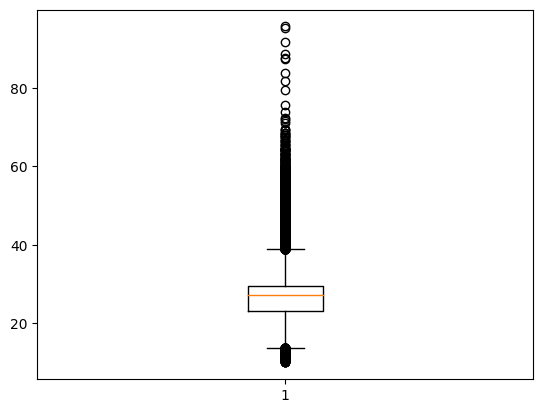

In [71]:
plt.boxplot(df['bmi'])
plt.show()

In [72]:
mean = df['bmi'].mean()
std  = df['bmi'].std()

# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

# Drop the outliers
df = df[(df['bmi'] >= lower_bound)
                & (df['bmi'] <= upper_bound)]

Lower Bound : 13.798492436940267
Upper Bound : 40.39374091384964


In [73]:
df['diabetes'].value_counts()

0    84032
1     3427
Name: diabetes, dtype: int64

In [74]:
df['smoking_history'].value_counts()

never          30976
No Info        30966
current         8277
former          7971
not current     5703
ever            3566
Name: smoking_history, dtype: int64

In [75]:
df = df[df['smoking_history']!='No Info']

In [76]:
df['smoking_history'].value_counts()

never          30976
current         8277
former          7971
not current     5703
ever            3566
Name: smoking_history, dtype: int64

In [77]:
df['age'].unique()

array([80.  , 28.  , 36.  , 76.  , 20.  , 44.  , 42.  , 32.  , 53.  ,
       78.  , 67.  , 15.  , 37.  , 40.  , 69.  , 72.  , 30.  , 45.  ,
       43.  , 41.  , 26.  , 77.  , 29.  , 60.  , 38.  , 57.  , 19.  ,
       21.  , 59.  , 27.  , 56.  , 34.  , 54.  , 79.  , 74.  , 55.  ,
       62.  , 47.  , 66.  , 68.  ,  5.  , 75.  , 22.  , 58.  , 24.  ,
       18.  , 16.  , 46.  , 31.  , 49.  , 25.  , 39.  , 65.  , 14.  ,
       70.  , 48.  , 11.  , 51.  , 17.  ,  9.  , 64.  , 63.  , 52.  ,
       50.  , 35.  , 61.  ,  2.  , 33.  , 71.  ,  4.  ,  6.  ,  3.  ,
       23.  , 10.  , 13.  , 73.  ,  1.24,  1.88, 12.  ,  7.  ,  8.  ,
        1.4 ,  1.16,  1.72,  0.24,  1.64,  1.32,  0.32,  0.48,  1.8 ,
        0.88,  0.56,  1.08,  1.  ,  0.8 ,  1.48,  1.56,  0.72,  0.4 ,
        0.64,  0.16])

In [78]:
df['age'] = df['age'].astype(int)

In [79]:
df['age'].unique()

array([80, 28, 36, 76, 20, 44, 42, 32, 53, 78, 67, 15, 37, 40, 69, 72, 30,
       45, 43, 41, 26, 77, 29, 60, 38, 57, 19, 21, 59, 27, 56, 34, 54, 79,
       74, 55, 62, 47, 66, 68,  5, 75, 22, 58, 24, 18, 16, 46, 31, 49, 25,
       39, 65, 14, 70, 48, 11, 51, 17,  9, 64, 63, 52, 50, 35, 61,  2, 33,
       71,  4,  6,  3, 23, 10, 13, 73,  1, 12,  7,  8,  0])

In [80]:
df = df[df['age']!=0]

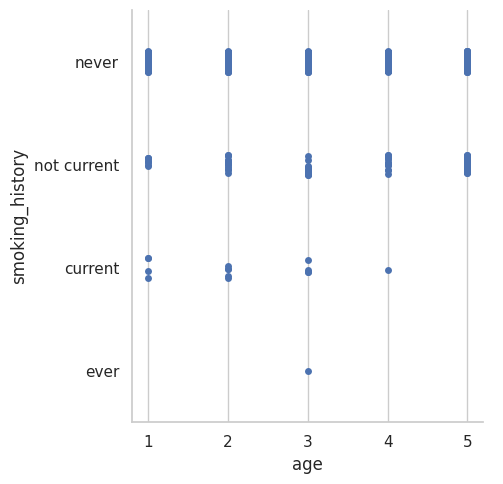

In [82]:
sns.set(style="whitegrid")
sns.catplot(x="age", y="smoking_history", data=df.loc[df['age'] <=5])
plt.show()

In [83]:
df = df[~((df['age'] < 5) & df['smoking_history'].isin(['ever', 'current']))]

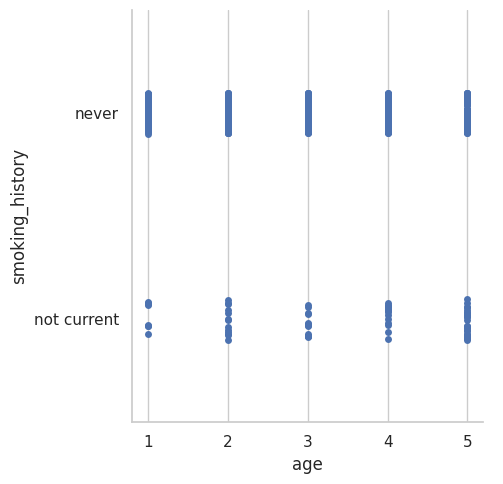

In [84]:
sns.set(style="whitegrid")
sns.catplot(x="age", y="smoking_history", data=df.loc[df['age'] <=5])
plt.show()

In [85]:
df['gender'].value_counts()

Female    34018
Male      22402
Other        12
Name: gender, dtype: int64

In [86]:
df = df[df['gender'] != 'Other']

In [87]:
df['gender'].value_counts()

Female    34018
Male      22402
Name: gender, dtype: int64

In [88]:
df = pd.get_dummies(data=df, drop_first=True)
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80,0,1,25.19,6.60,140,0,0,0,0,1,0
2,28,0,0,27.32,5.70,158,0,1,0,0,1,0
3,36,0,0,23.45,5.00,155,0,0,0,0,0,0
4,76,1,1,20.14,4.80,155,0,1,0,0,0,0
5,20,0,0,27.32,6.60,85,0,0,0,0,1,0


In [89]:
change_col =  ['gender_Male','smoking_history_ever','smoking_history_former','smoking_history_never','smoking_history_not current']
for col in change_col:
    df[col] = df[col].replace(False, 0)
    df[col] = df[col].replace(True, 1)
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80,0,1,25.19,6.60,140,0,0,0,0,1,0
2,28,0,0,27.32,5.70,158,0,1,0,0,1,0
3,36,0,0,23.45,5.00,155,0,0,0,0,0,0
4,76,1,1,20.14,4.80,155,0,1,0,0,0,0
5,20,0,0,27.32,6.60,85,0,0,0,0,1,0


In [90]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
columns_to_scale = ['age', 'bmi','HbA1c_level','blood_glucose_level']
scaler.fit(df[columns_to_scale])
scaled_columns = scaler.transform(df[columns_to_scale])
df[columns_to_scale] = scaled_columns

In [91]:
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Male,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.00,0,1,0.43,0.77,0.50,0,0,0,0,1,0
2,0.34,0,0,0.51,0.55,0.65,0,1,0,0,1,0
3,0.44,0,0,0.36,0.38,0.63,0,0,0,0,0,0
4,0.95,1,1,0.24,0.32,0.63,0,1,0,0,0,0
5,0.24,0,0,0.51,0.77,0.04,0,0,0,0,1,0


In [92]:
x = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

In [93]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(random_state=42)
x_undersample, y_undersample = undersampler.fit_resample(x, y)

df_ux = pd.DataFrame(x_undersample, columns=x.columns)
df_uy = pd.Series(y_undersample)

In [94]:
from sklearn.model_selection import train_test_split

x_train_u, x_test_u, y_train_u, y_test_u = train_test_split(df_ux, df_uy, test_size=0.3, random_state=42)
x_train_u.shape

(3980, 11)

In [95]:
#oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_oversample, y_oversample = smote.fit_resample(x, y)

df_ox = pd.DataFrame(x_oversample, columns=x.columns)
df_oy = pd.Series(y_oversample)

In [96]:
from sklearn.model_selection import train_test_split

x_train_o, x_test_o, y_train_o, y_test_o = train_test_split(df_ox, df_oy, test_size=0.3, random_state=42)
x_train_o.shape

(75007, 11)

In [97]:
# Importing Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.svm import SVC
import xgboost as xgb

In [98]:
key = ['Logistic Regression','K-Neighbors Classifier','Decision Tree Classifier','Random Forest Classifier','Adaboost Classifier','Gradient Boosting Classifier','XGB Classifier','SVM']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree"),SVC(kernel="linear")]
models = dict(zip(key,value))
models

{'Logistic Regression': LogisticRegression(),
 'K-Neighbors Classifier': KNeighborsClassifier(n_neighbors=2),
 'Decision Tree Classifier': DecisionTreeClassifier(random_state=10),
 'Random Forest Classifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'Adaboost Classifier': GradientBoostingClassifier(random_state=20),
 'Gradient Boosting Classifier': AdaBoostClassifier(),
 'XGB Classifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_wei

In [99]:
predicted =[]
mod=[]
for name,algo in models.items():
    model=algo
    mod.append(name)
    model.fit(x_train_u,y_train_u)
    predict = model.predict(x_test_u)
    acc = accuracy_score(y_test_u, predict)
    predicted.append(acc*100)
    predict_train = model.predict(x_train_u)
    #print(name,(acc*100),"%")
    print(name,": Test Accuracy = ",(acc*100),"%")
    print(name,": Train Accuracy = ",(accuracy_score(y_train_u, predict_train)*100),"%")
    print(classification_report(y_test_u, predict))

Logistic Regression : Test Accuracy =  82.64947245017585 %
Logistic Regression : Train Accuracy =  84.07035175879398 %
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       889
           1       0.79      0.87      0.83       817

    accuracy                           0.83      1706
   macro avg       0.83      0.83      0.83      1706
weighted avg       0.83      0.83      0.83      1706

K-Neighbors Classifier : Test Accuracy =  76.61195779601407 %
K-Neighbors Classifier : Train Accuracy =  89.47236180904522 %
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       889
           1       0.80      0.68      0.74       817

    accuracy                           0.77      1706
   macro avg       0.77      0.76      0.76      1706
weighted avg       0.77      0.77      0.76      1706

Decision Tree Classifier : Test Accuracy =  79.1324736225088 %
Decision Tree Classifier : Train Accura

In [100]:
data = pd.DataFrame({'Model': mod, 'Accuracy': predicted})
data

,Model,Accuracy
0,Logistic Regression,82.65
1,K-Neighbors Classifier,76.61
2,Decision Tree Classifier,79.13
3,Random Forest Classifier,85.35
4,Adaboost Classifier,85.76
5,Gradient Boosting Classifier,85.23
6,XGB Classifier,84.11
7,SVM,82.06


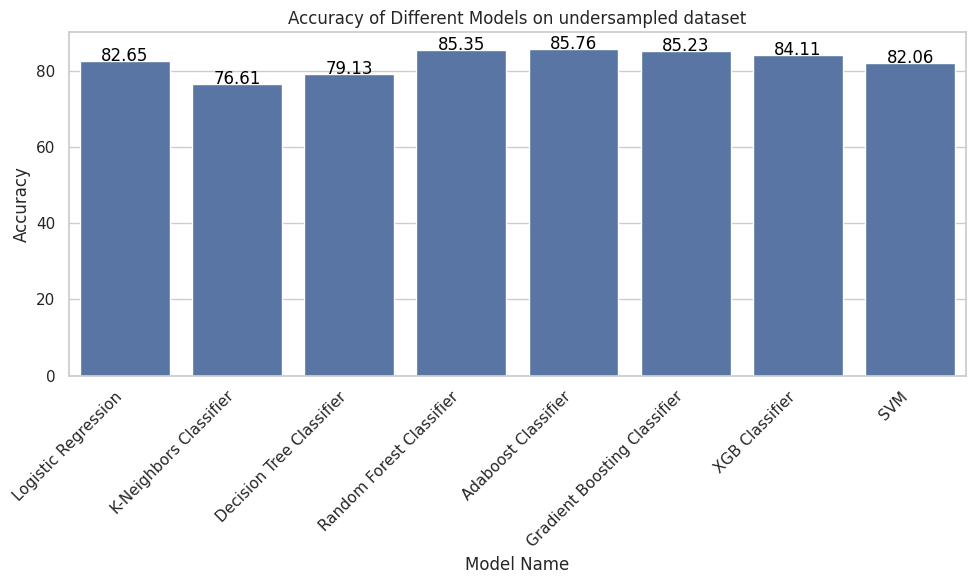

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=data)

for index, row in data.iterrows():
    plt.text(index, row['Accuracy'], round(row['Accuracy'], 2), color='black', ha="center")

plt.xticks(rotation=45, ha='right')

plt.title('Accuracy of Different Models on undersampled dataset')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

In [102]:
predicted =[]
mod=[]
for name,algo in models.items():
    model=algo
    mod.append(name)
    model.fit(x_train_o,y_train_o)
    predict = model.predict(x_test_o)
    acc = accuracy_score(y_test_o, predict)
    predicted.append(acc*100)
    predict_train = model.predict(x_train_o)
    #print(name,(acc*100),"%")
    print(name,": Test Accuracy = ",(acc*100),"%")
    print(name,": Train Accuracy = ",(accuracy_score(y_train_o, predict_train)*100),"%")
    print(classification_report(y_test_o, predict))

Logistic Regression : Test Accuracy =  83.97673188789001 %
Logistic Regression : Train Accuracy =  83.34422120602078 %
              precision    recall  f1-score   support

           0       0.86      0.81      0.83     16072
           1       0.82      0.87      0.85     16075

    accuracy                           0.84     32147
   macro avg       0.84      0.84      0.84     32147
weighted avg       0.84      0.84      0.84     32147

K-Neighbors Classifier : Test Accuracy =  93.97455439076742 %
K-Neighbors Classifier : Train Accuracy =  98.95476422200595 %
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     16072
           1       0.93      0.95      0.94     16075

    accuracy                           0.94     32147
   macro avg       0.94      0.94      0.94     32147
weighted avg       0.94      0.94      0.94     32147

Decision Tree Classifier : Test Accuracy =  95.57034871061063 %
Decision Tree Classifier : Train Accur

In [103]:
data1 = pd.DataFrame({'Model': mod, 'Accuracy': predicted})
data1

,Model,Accuracy
0,Logistic Regression,83.98
1,K-Neighbors Classifier,93.97
2,Decision Tree Classifier,95.57
3,Random Forest Classifier,96.76
4,Adaboost Classifier,93.98
5,Gradient Boosting Classifier,91.50
6,XGB Classifier,96.88
7,SVM,84.16


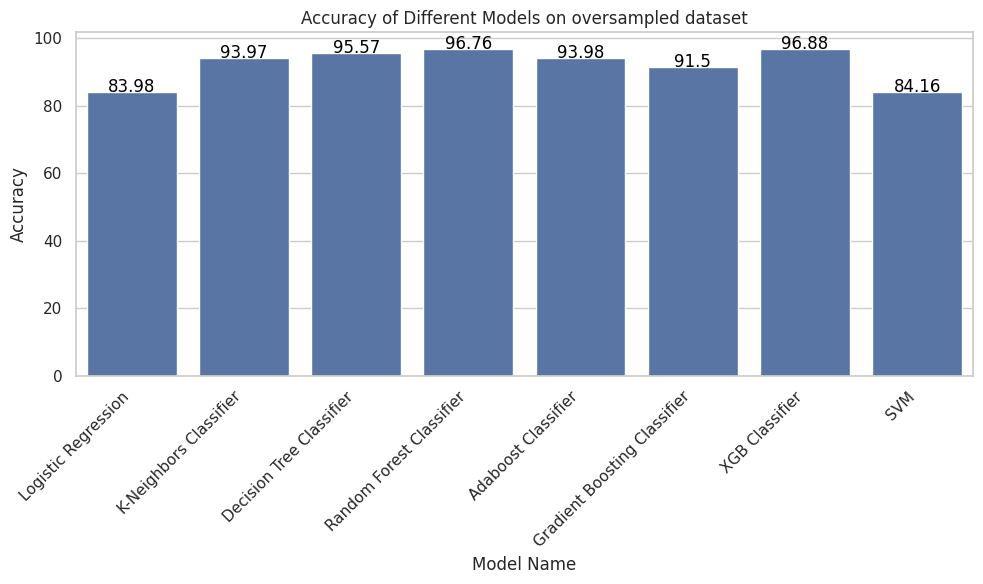

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=data1)

for index, row in data1.iterrows():
    plt.text(index, row['Accuracy'], round(row['Accuracy'], 2), color='black', ha="center")

plt.xticks(rotation=45, ha='right')

plt.title('Accuracy of Different Models on oversampled dataset')
plt.xlabel('Model Name')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

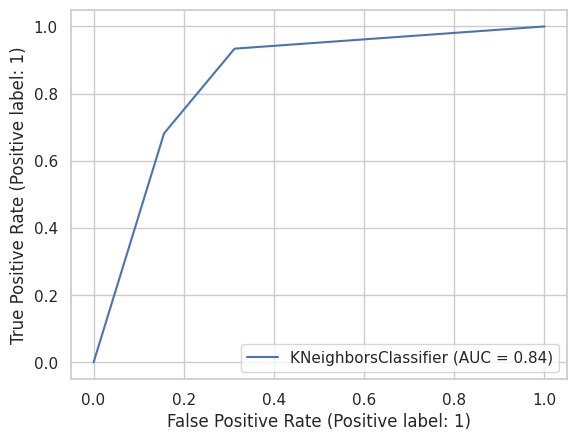

In [105]:
#kNN model has the lowest accuracy
from sklearn.metrics import RocCurveDisplay
kNN = KNeighborsClassifier(n_neighbors = 2, weights ='uniform')
kNN.fit(x_train_u,y_train_u)
ROC_kNN = RocCurveDisplay.from_estimator(kNN, x_test_u, y_test_u)

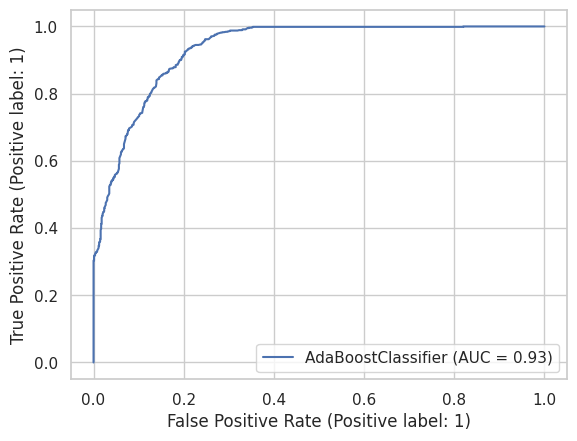

In [106]:
#AdaBoost has the highest accuracy
AdaBoost = AdaBoostClassifier()
AdaBoost.fit(x_train_u,y_train_u)
ROC_AdaBoost= RocCurveDisplay.from_estimator(AdaBoost, x_test_u, y_test_u)

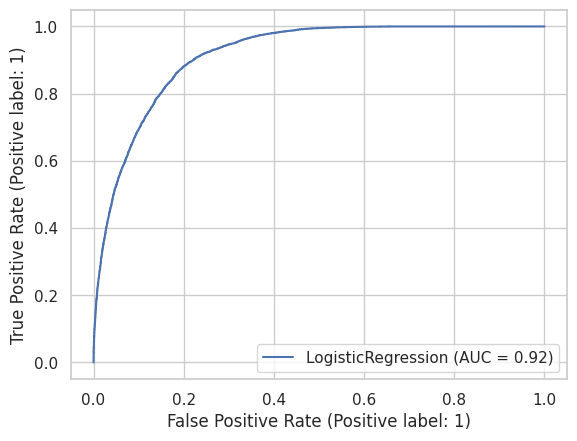

In [107]:
#Logistic regression model has the lowest accuracy
LR = LogisticRegression()
LR.fit(x_train_o,y_train_o)
ROC_LR = RocCurveDisplay.from_estimator(LR, x_test_o, y_test_o)

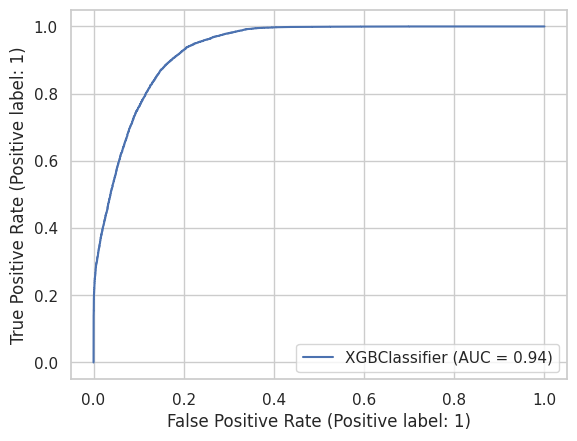

In [108]:
#XGBoost classifier model has the highest accuracy
XGB = xgb.XGBClassifier(random_state=0,booster="gbtree")
XGB.fit(x_train_u,y_train_u)
ROC_XGB = RocCurveDisplay.from_estimator(XGB, x_test_o, y_test_o)